In [ ]:
# importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Leitura do CSV
df = pd.read_csv('transfusion_tabela7.csv')
df

,Modelo,Encoder_Decoder,Delta_Params(%),C4_PPL,Wiki_PPL,Llama_Acc(%),CIDEr,FID,CLIP
0,0.16B,Linear,0.5,14.8,8.8,44.2,6.2,37.6,20.0
1,0.16B,U-Net,106.1,14.4,8.5,45.7,15.3,18.8,23.9
2,0.37B,Linear,0.4,12.0,7.0,47.9,11.1,21.5,22.4
3,0.37B,U-Net,71.3,11.8,6.9,48.8,21.1,18.1,24.9
4,0.76B,Linear,0.4,10.4,6.0,51.7,16.0,20.3,24.0
5,0.76B,U-Net,35.5,10.3,5.9,51.9,25.4,16.7,25.4
6,1.4B,Linear,0.4,9.5,5.4,53.8,19.1,19.4,24.3
7,1.4B,U-Net,19.3,9.4,5.4,53.4,28.1,16.6,25.7
8,7B,Linear,0.3,7.7,4.3,61.5,27.2,18.6,25.9
9,7B,U-Net,3.8,7.8,4.3,61.1,33.7,16.0,26.5


**Encoder_Decoder**
* Tipo de camada usada pra processar imagens (Linear ou U-Net).

**Delta_Params(%)**
* Quanto isso aumentou o tamanho total do modelo.

**C4_PPL**

* Significa Perplexidade no conjunto de dados C4 (Colossal Clean Crawled Corpus).  
* Perplexidade (PPL) mede o quão bem um modelo de linguagem prevê um texto.  
* Quanto menor, melhor — um valor alto indica que o modelo está "confuso" com os dados.

**Wiki_PPL**

* Semelhante ao C4_PPL, mas usa dados da Wikipedia.  
* Mede o quão bem o modelo entende texto baseado em uma fonte confiável e estruturada.  
* Também: quanto menor, melhor.

**Llama_Acc**

* Acurácia (%) em uma suíte de benchmarks usada pelo Llama 2.  
* Inclui tarefas como:  
  - *HellaSwag* (raciocínio comum)  
  - *PIQA* (raciocínio físico)  
  - *ARC*, *BoolQ*, entre outros.  
* Mede a precisão do modelo em tarefas de escolha múltipla.  
* Maior é melhor.

**CIDEr (Consensus-based Image Description Evaluation)**

* Avalia a qualidade de legendas geradas por IA para imagens.  
* Compara as legendas com descrições humanas usando TF-IDF ponderado.  
* Maior é melhor — indica maior qualidade semântica nas legendas.

**FID (Fréchet Inception Distance)**

* Mede a qualidade de imagens geradas por IA.  
* Compara estatísticas das imagens geradas com as de imagens reais.  
* Muito usado em modelos como DALL·E, Stable Diffusion, etc.  
* Menor é melhor — valores baixos indicam imagens mais realistas.

**CLIP Score**

* Mede o alinhamento entre a imagem gerada e o texto do prompt.  
* Usa o modelo CLIP (da OpenAI) para comparar texto e imagem no mesmo espaço vetorial.  
* Maior é melhor — indica que a imagem corresponde bem ao que foi solicitado.

In [ ]:
# correlação entre FID e CLIP
pearson_corr = df["FID"].corr(df["CLIP"], method="pearson")
spearman_corr = df["FID"].corr(df["CLIP"], method="spearman")
kendall_corr = df["FID"].corr(df["CLIP"], method="kendall")

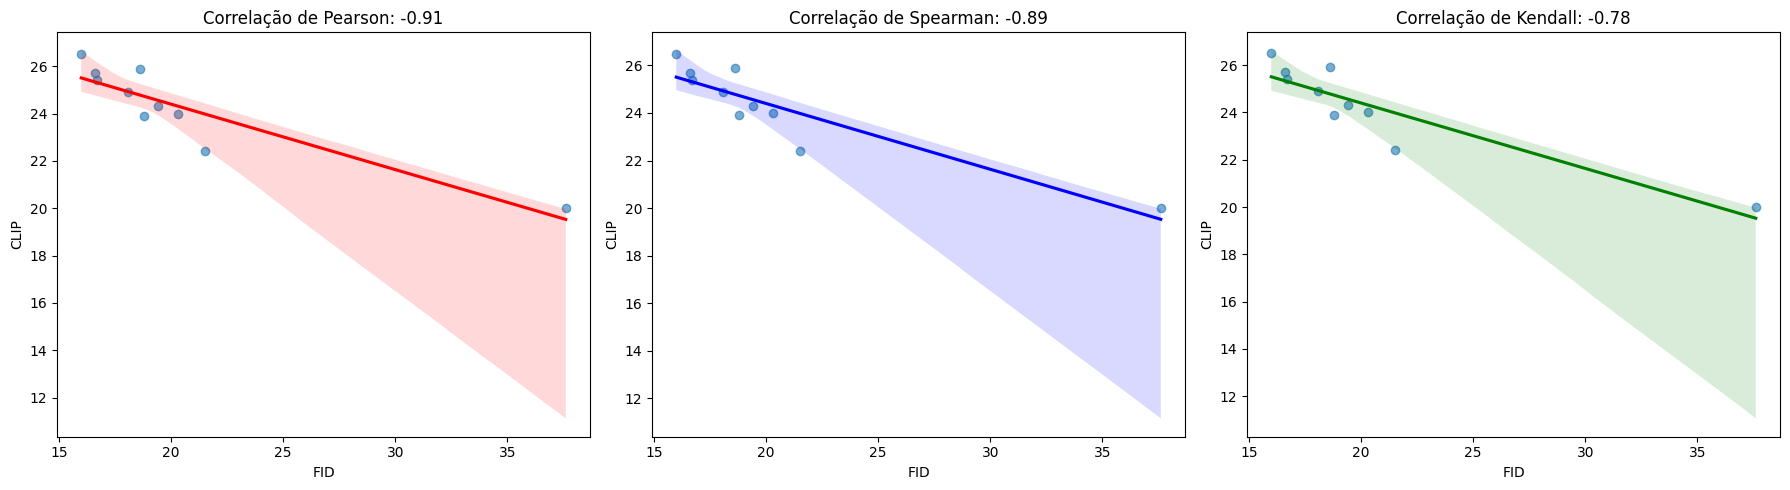

In [ ]:
# Criar os gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pearson
sns.regplot(x="FID", y="CLIP", data=df, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"}, ax=axes[0])
axes[0].set_title(f"Correlação de Pearson: {pearson_corr:.2f}")
axes[0].set_xlabel("FID")
axes[0].set_ylabel("CLIP")

# Spearman
sns.regplot(x="FID", y="CLIP", data=df, scatter_kws={"alpha": 0.6}, line_kws={"color": "blue"}, ax=axes[1])
axes[1].set_title(f"Correlação de Spearman: {spearman_corr:.2f}")
axes[1].set_xlabel("FID")
axes[1].set_ylabel("CLIP")

# Kendall
sns.regplot(x="FID", y="CLIP", data=df, scatter_kws={"alpha": 0.6}, line_kws={"color": "green"}, ax=axes[2])
axes[2].set_title(f"Correlação de Kendall: {kendall_corr:.2f}")
axes[2].set_xlabel("FID")
axes[2].set_ylabel("CLIP")

plt.tight_layout()
plt.show()

In [ ]:
# Valores das correlações
print("Pearson:", pearson_corr)
print("Spearman:", spearman_corr)
print("Kendall:", kendall_corr)

Pearson: -0.9060751292332814
Spearman: -0.8909090909090909
Kendall: -0.7777777777777777


**Conclusão**

A partir da análise da correlação entre as métricas FID e CLIP, obtivemos os seguintes resultados:

* Correlação de Pearson: - 0.91

* Correlação de Spearman: - 0.89

* Correlação de Kendall: - 0.78

Esses valores indicam uma forte correlação negativa entre as duas variáveis. Em outras palavras, à medida que o FID aumenta (indicando pior qualidade visual das imagens geradas), o CLIP score tende a diminuir (indicando menor alinhamento entre imagem e texto).

Portanto, é possível concluir que imagens com melhor qualidade visual (baixa pontuação de FID) também apresentam melhor alinhamento semântico com o texto (alta pontuação de CLIP). Esses resultados confirmam a expectativa teórica de que a qualidade visual impacta positivamente a consistência entre imagem e descrição textual em modelos multimodais.